## Title: Bike-sharing rental process

### Project Member's Name:
Mohamed Shafeeq VP

Sonali Kundu

Loh Xiao Tong

### Project Code: PRCP-1018-BikeRental

In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Businesscase:- Predication of bike rental count daily based on the environmental and seasonal settings
#### Regression 

In [2]:
## read the dataset
data=pd.read_csv('day.csv')
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


## Basic Checks

In [38]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [39]:
data.describe(include='O')

,dteday
count,731
unique,731
top,2011-11-28
freq,1


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Basic Understanding of Features --> Domain Analysis
 day.csv has the following fields
	
	- instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

## Exploratory Data Analysis

### Univariate Analysis: Analysing one variable at a time

In [9]:
import sweetviz as sv
my_report = sv.analyze(data)## pass the original dataframe
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights From Mohamed Shafeeq VP
Insights

1)Month: Most data points lie in the month 1 and 12.

2)Holiday: More data lies in non holiday.

3)Workingday: More data points lies in working day.

4)Weather: Clear weather has more data points.

5)Temperature: It seems to be almost normal distribution.

6)atemp: Data seems to be left skewed.

7)hum: Data seems to be left skewed.

8)windspeed, casual, registered and cnt: Data seems to be right skewed.


## Bivariate Analysis -- Analyzing 2 variables at a time

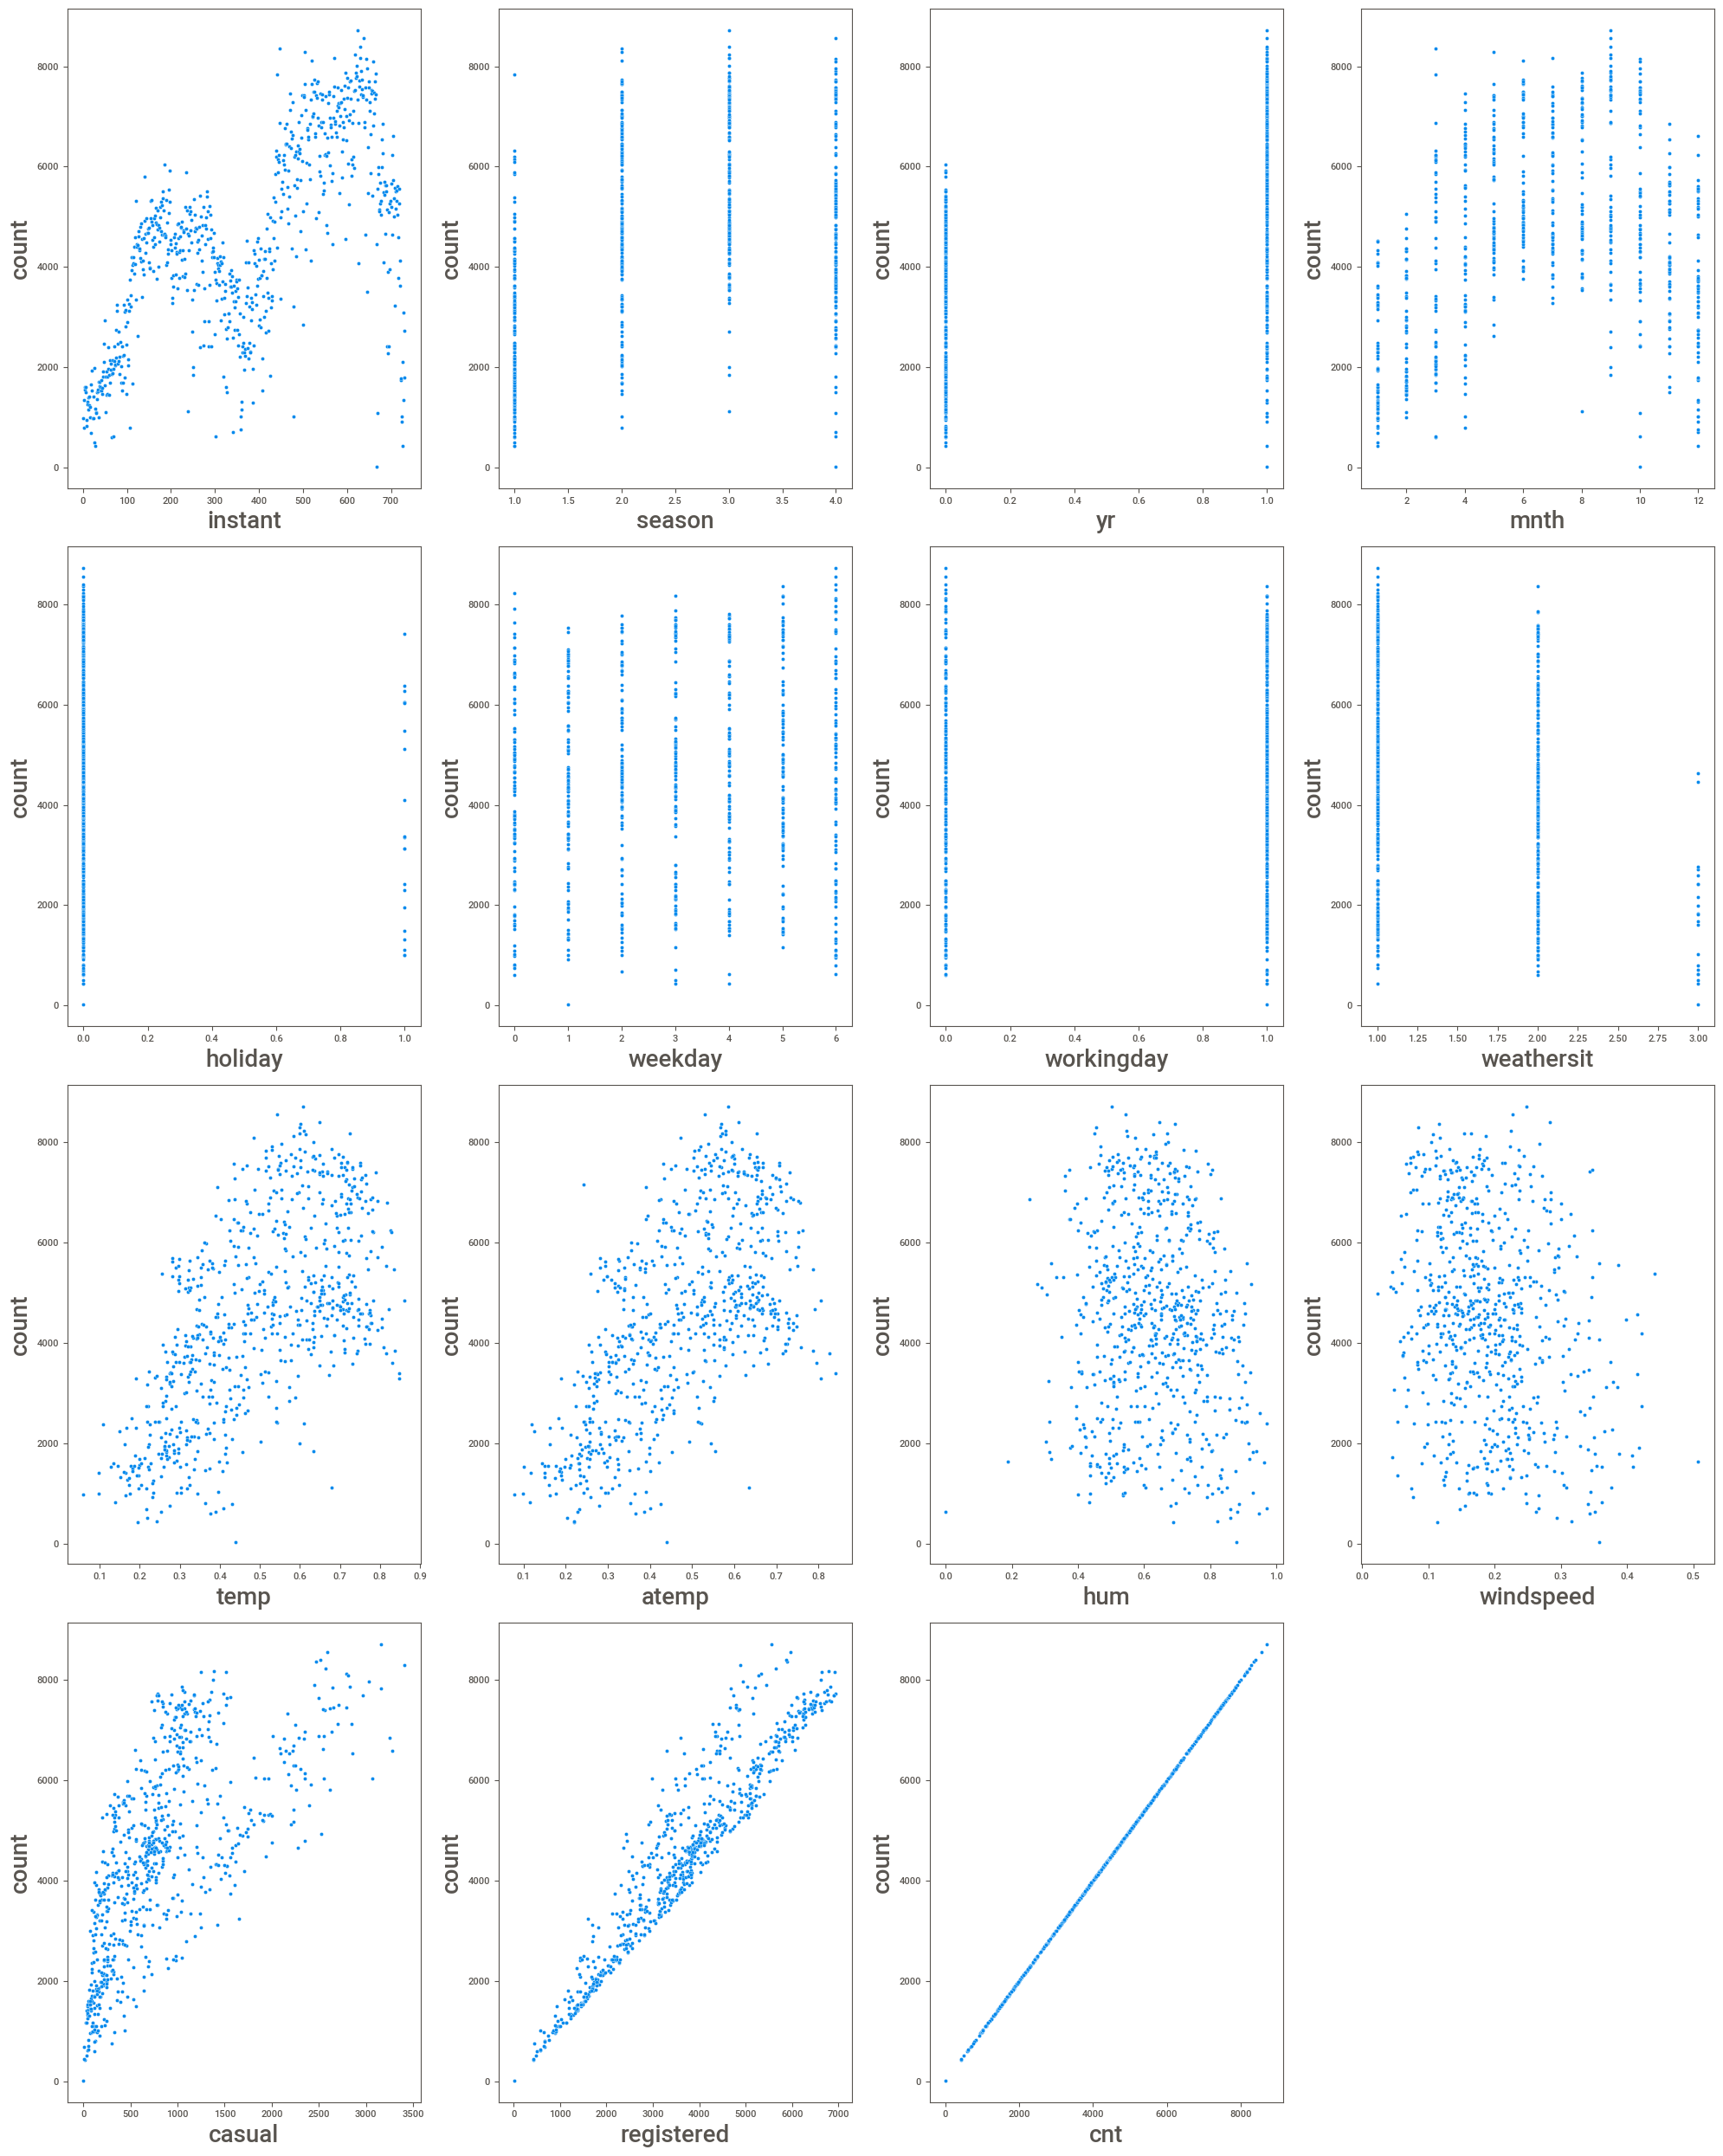

In [11]:
data_num=data.drop(['dteday'],axis=1)
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_num:
    if plotnumber<=17 :
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=data_num[column].dropna(axis=0)
                        ,y=data.cnt)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

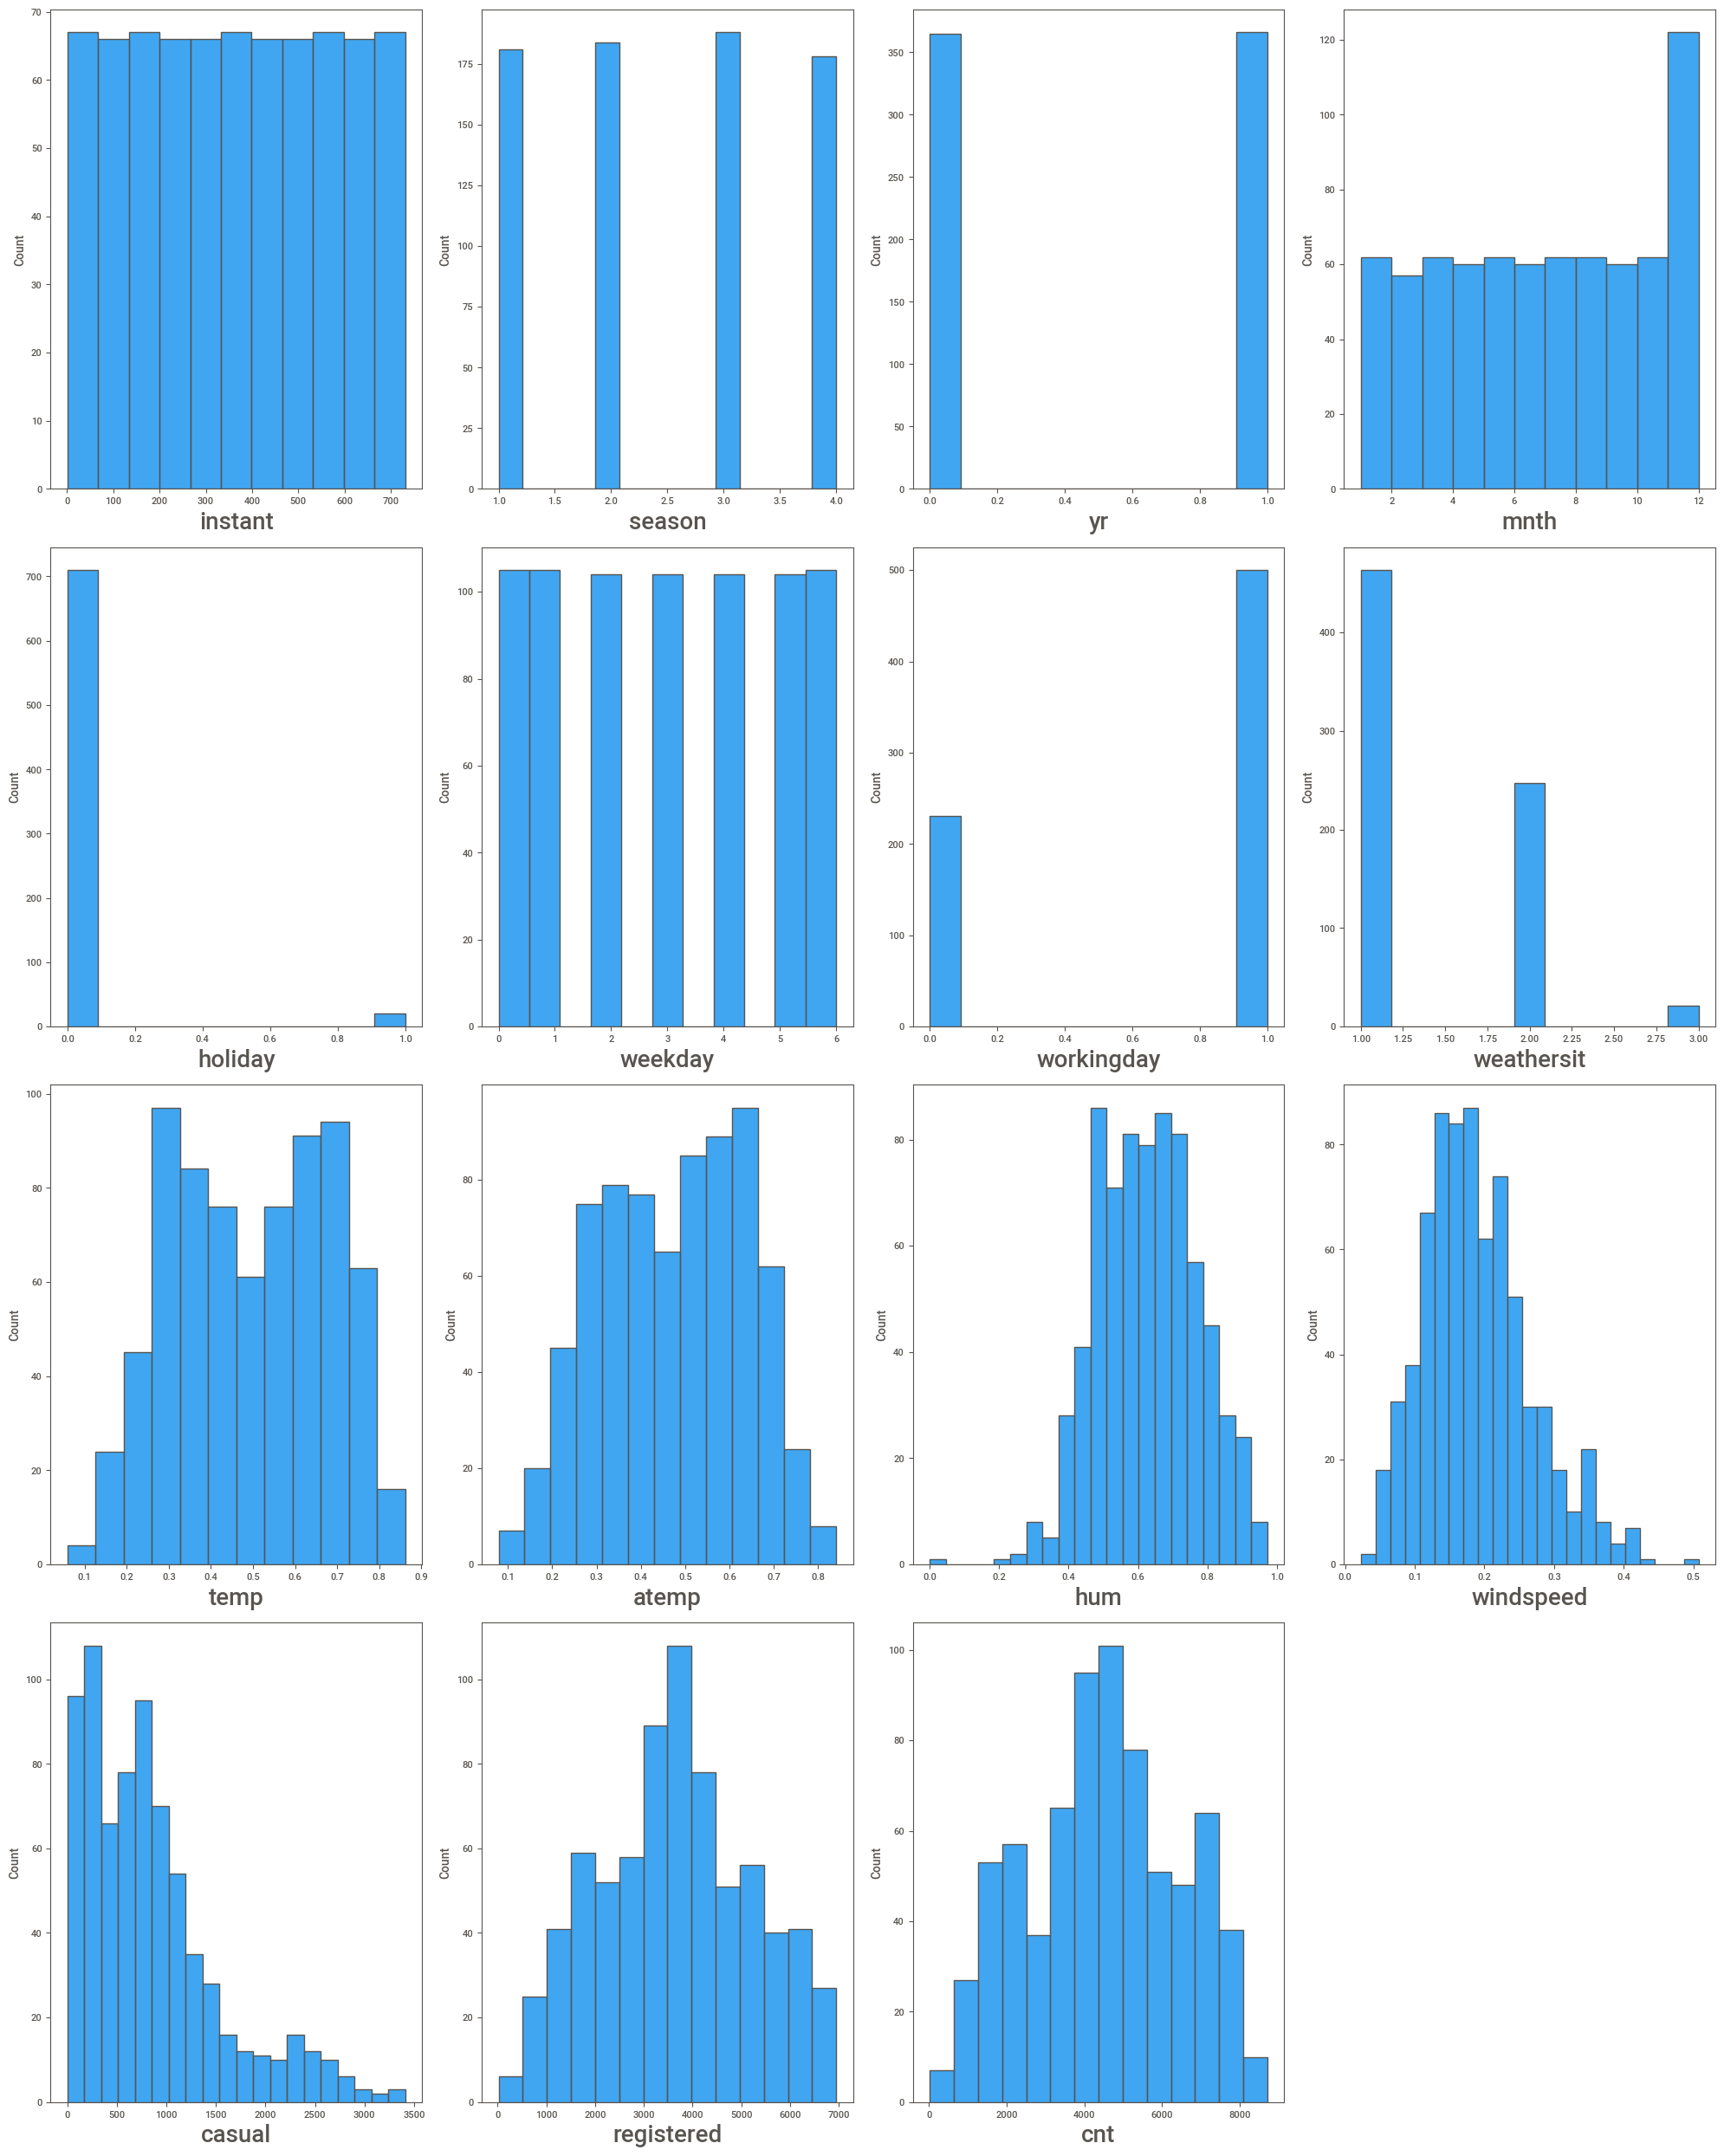

In [19]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_num:
    if plotnumber<=17 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=data_num[column].dropna(axis=0))
        plt.xlabel(column,fontsize=20)
        ##plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

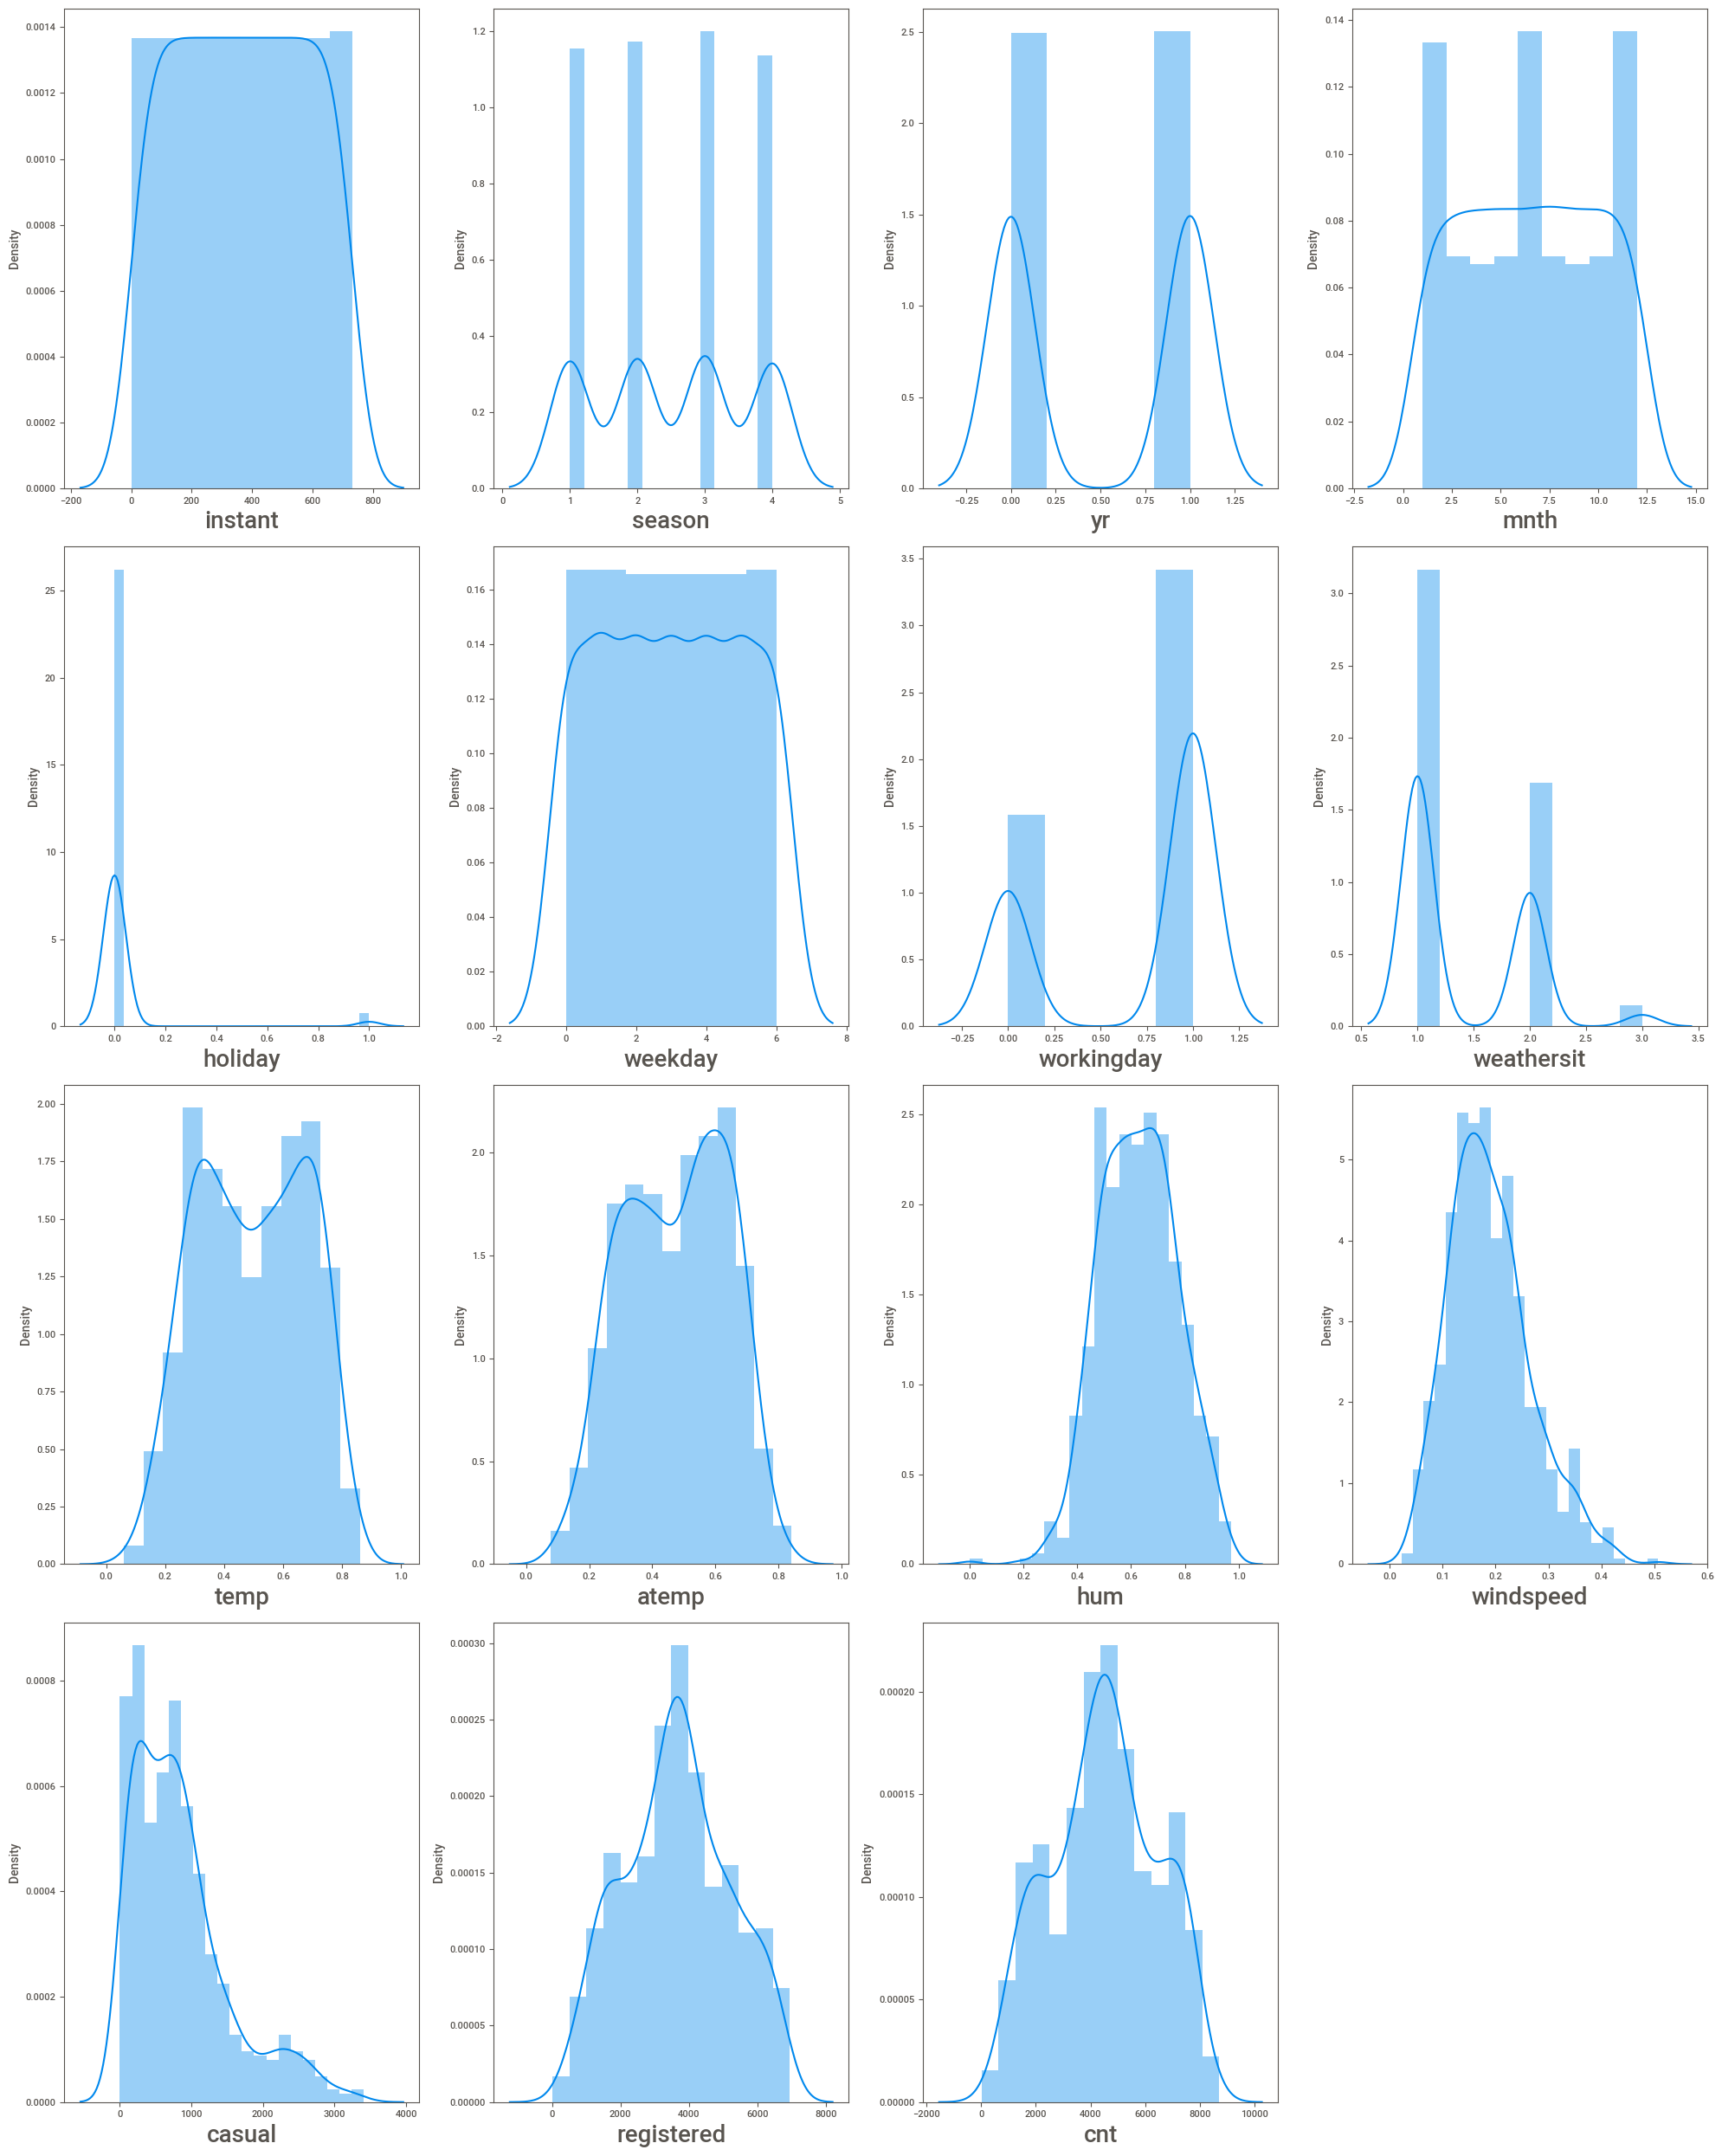

In [14]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_num:
    if plotnumber<=17 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x=data_num[column].dropna(axis=0))
        plt.xlabel(column,fontsize=20)
        ##plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Great, the relationship between the dependent and independent variables look fairly linear.
Thus, our linearity assumption is satisfied.

## Insights From Bivariate Analysis
### insights from Sonali Kundu
instant: It is a record index, it is unique Id feature type.from the graph we can say that from 0 to 17378 instant is there.

season:In this dataset there are 4 types of seasons. (1:springer, 2:summer, 3:fall, 4:winter). From the graph we can say that for almost every type of season bike rental amount is more or less same. For season:3 it is slighly high among all of them.

yr:This dataset contains data for two consicutive years i.e. year (0: 2011, 1:2012). From the graph we can see that bike rental count for two both years are almost same. But from scatterplot we can see that in the year 2012, more people took bike on rent than 2011.

mnth:In this dataset this column says the count of on which month(1 to12) of the particular year, people took bike on rent. from the scatterplot we can say that among all 12 months, on 9th and 10th month(September and October) most of the people took bike on rent.

hour: This feature says that on what time of the day people take bike for rent. we know that every day consists of hour (0 to 23). So, from the scatterplot we can see that around 8 A.M. (8) and 5 p.m.(17) and 6 p.m(18) most of the people hire bikes, so we can conclude that as those times are like office or school starting(8 A.M.) and closing hours(5 or 6 P.M.) so most of the people take bike on rental.

holiday: In the dataset this feature says tht weather day is holiday or not on which bike was rented. Here 0 denotes the day is not holiday and 1 denotes the day was holiday. So, from the scatter plot we can say that most of the people are taking bikes on rent on the non-holiday(0) days, less people take bikes on rent on holiday(0).

weekday: In the dataset this feature says the day of the week(sunday to saturday) on which bikes were taken on rent. From the scatterplot we can see that from Monday(1) to Friday(5) bikes were taken on rent most as these are working days and less bikes were rented on Sunday(0) and Saturday(6) as these are weekend.

workingday : if day is neither weekend nor holiday is 1, otherwise is 0. So from the scatterPlot we can see that most of the people took bike on rent on the workingday:1 i.e. on those days when offices, schols and other organisations are mostly remain opened.

weathersit:In this feature there are 4 type of unique attribute, they are as following:
        - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
        From the above histplot we can see that for weathersit 1, the count is most, i.e. most of the people taking bike on rent on 1: Clear, Few clouds, Partly cloudy, Partly cloudy weather.
        And when the weathersit:3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds less people takibg bike on rent. So we can say that if weather is rainy or snowy very less people goes out so for that very less people take bikes on rent.This feature is important for this dataset.
      
temp: Normalized temperature in Celsius. The values are divided to 41 (max).  From the Distplot we can see that when temp is in range between 0.25 to 0.7 most of the people taking bike on rent.

atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max). It is very similar or we can say highly correlated to temp.

hum:Normalized humidity. The values are divided to 100 (max). From the graph we can see that most of the people hiring bike on rent when humidity's range is between 0.3 to 0.9.

windspeed: Normalized wind speed. The values are divided to 67 (max). From the graph we can say that when windspeed is between 0.1 to 0.3 most of the people taking bike on rent, when windspeed is more than 0.3 count of hiring bike is decreasing.

casual:This feature indicates count of casual users.count of casual users are between 0 to 100, it is very less than regestered users.

registered: This feature indiactes count of registered users. It is almost same like total count. registered users count is between 0 to 800. registered users hires more bikes than casual users.

cnt: It is our target variable in this dataset, it indicates count of total rental bikes including both casual and registered. It is between 0 to 1000.
      
      
### Insights from Loh Xiao Tong


People prefer to rent in the weather  Clear, Few clouds, Partly cloudy, Partly cloudy and fall is the most popular season.

The demand of bike rental increased in 2012 .

People rented a bike increased monthly,but decreased in nov ,dec
From mon to fri,the demand higher than weekend.

The demand increase at 8am and 18pm(before and after working hours).

The demand of bike in working day was higher .

temp and atemp had similiar trend ,when ,more people would choose bike as transportation.

People prefer to use bike when the humidity, temperature increase and the wind speed decrease.


### Insights From Mohamed Shafeeq VP

Insights
1)Date: The count increases towards the end of the year in both 2011 and 2012, the count is low in the first months. The 2012 is higher than the previous year.

2)Season: The highest count is obtained in fall season and lowest is obtained in springer.

3)Year: 2012 has the highest count.

4)Month: The count increases gradually from january to October and then shows a decline in the count. The highest count is seen in the month of October and lowest in January.

5)Hour: The count is high in between 5 to 7 pm. From morning 5 am to night 8 pm it shows a linear trend and after shows a decline in the count.

6)Holidays: Non holidays have more customers.

7)Weekday: Saturday and Sunday has less count compared to Monday to Friday.

8)Workingday: Working day is having more count compared to holiday.

9)weather: When the weather is Clear, Few clouds and Partly cloudy the count is maximum. The count shows a considerable fall when the wheather is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.

10)temperature and feeling temperature: When the temperature is getting warmer the count increases, it shows a linear relationship.

11)wind speed: When the wind speed increases the count decreases considerably, count and wind speed shows an inverse relationship.

12)casual: When the count of casual users increases the total count also increases. It shows a linear relationship.

13)registered:When the count of registered users increases the total count also increases. It shows a linear relationship.


## Data Preprocessing

In [20]:
## get the missing values
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [21]:
## No missing values are there to handle.

In [22]:
## There is one categorical Feature need to convert them to numerical equvalent

In [46]:
data.dteday.value_counts()

730    1
250    1
248    1
247    1
246    1
      ..
485    1
484    1
483    1
482    1
0      1
Name: dteday, Length: 731, dtype: int64

In [45]:
## Converting the numerical equivalent
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['dteday']=le.fit_transform(data['dteday'])

In [33]:
from datetime import datetime
data['dteday']=datetime.fromisoformat('2011-01-05').timestamp()

In [47]:
sns.countplot(x=data.dteday, data=data, ax=ax)
plt.show()

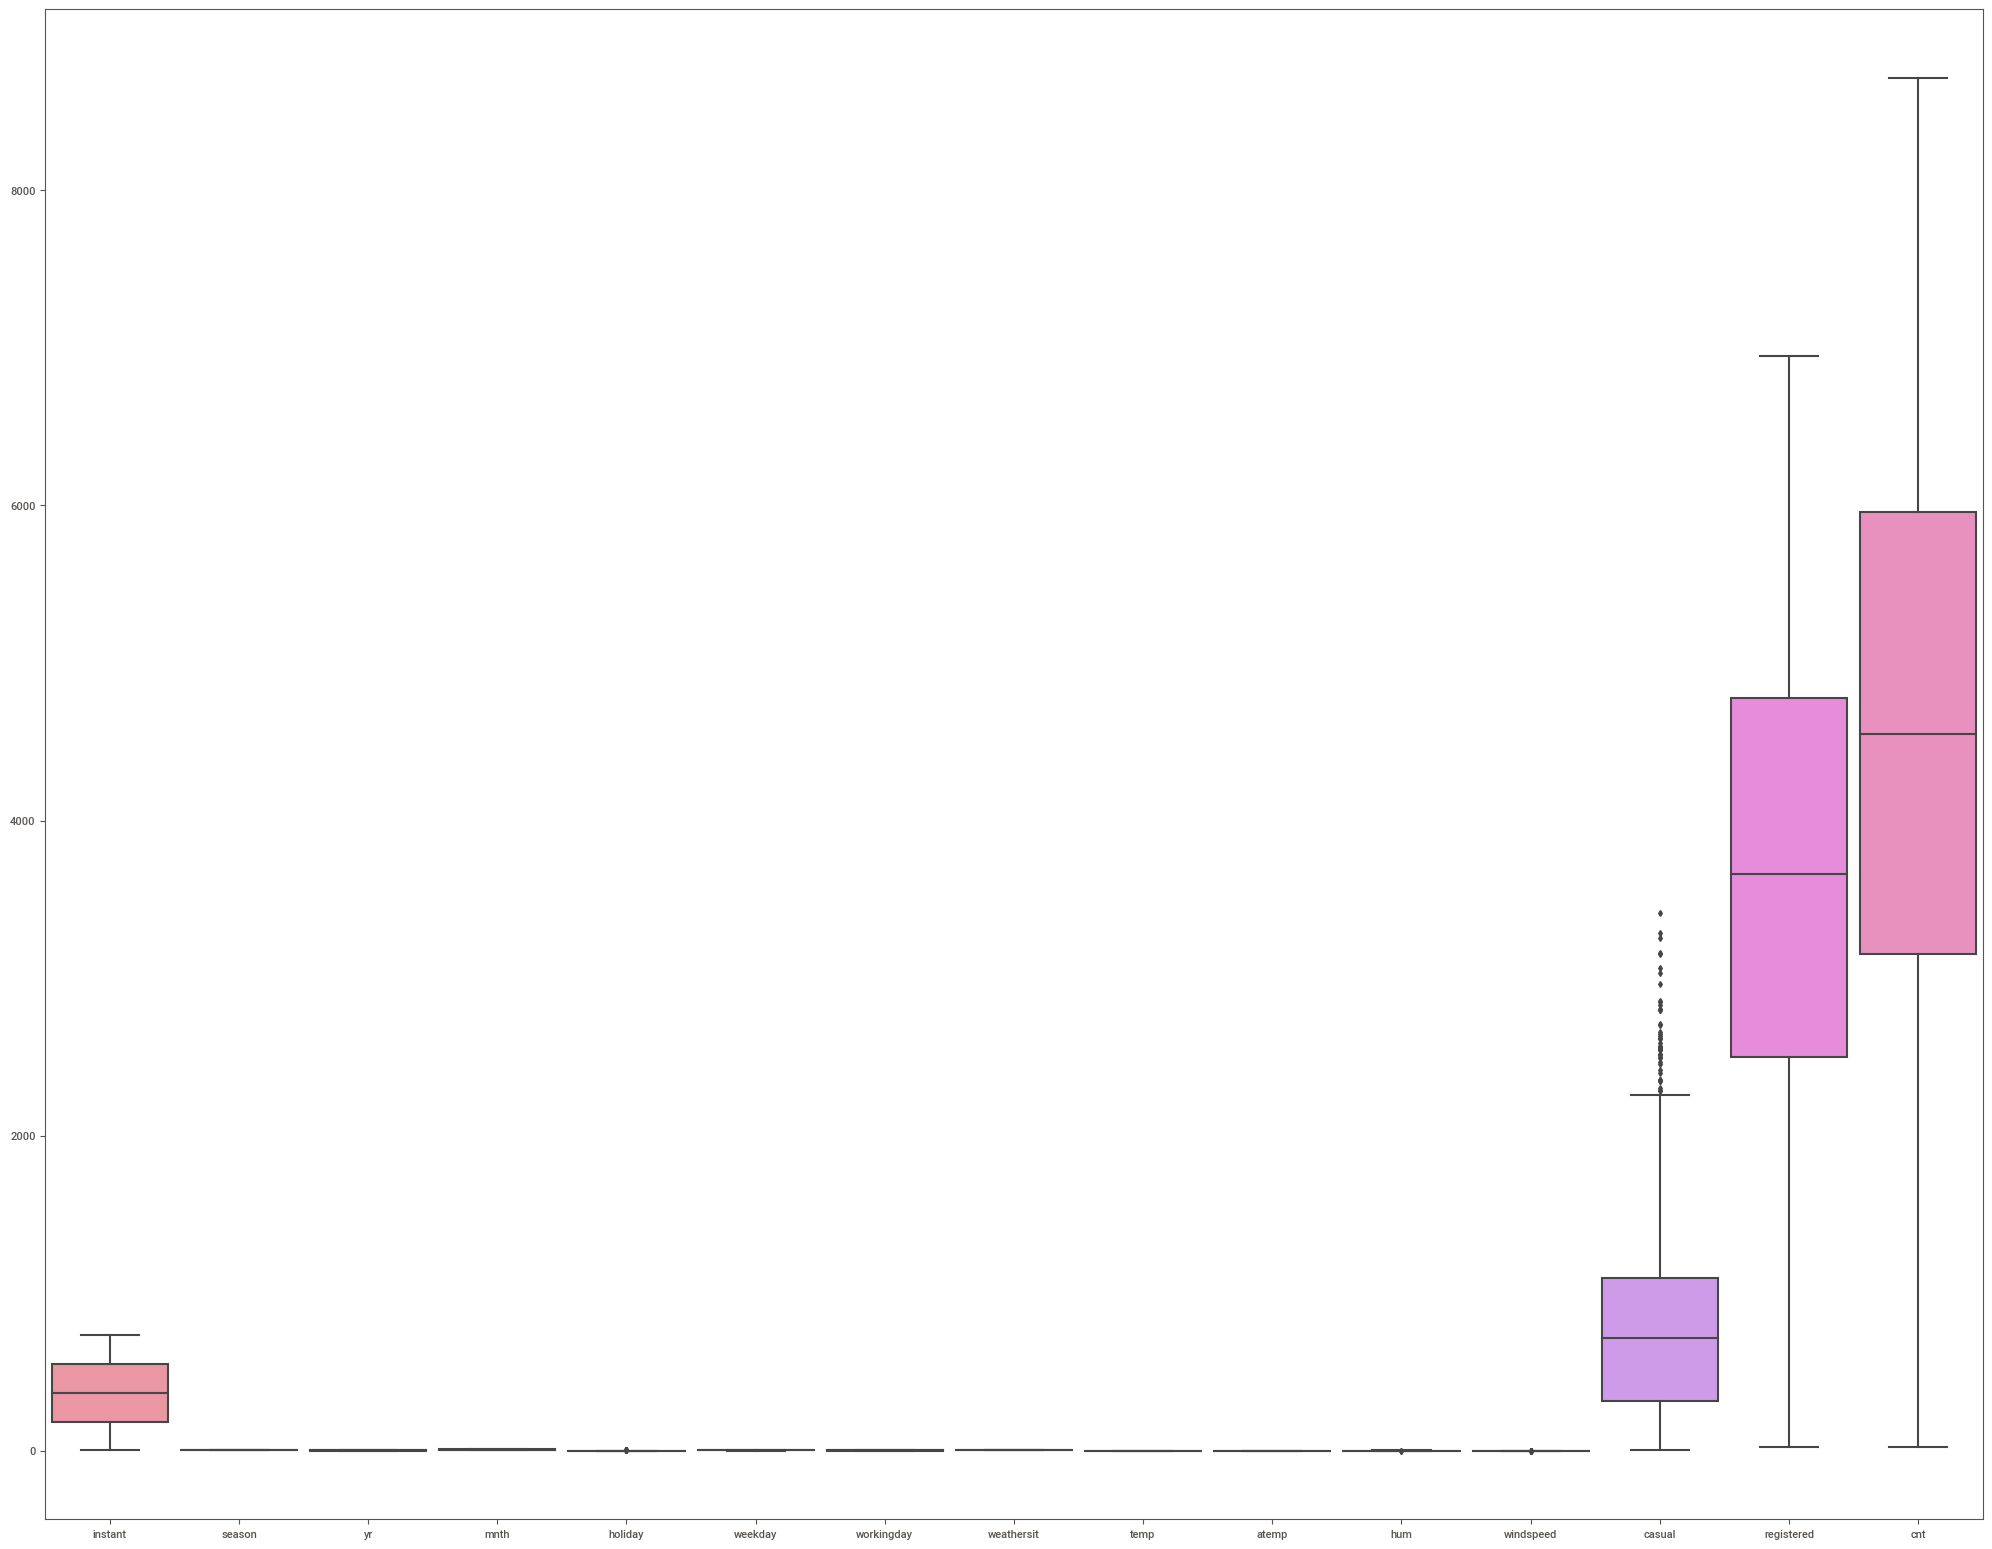

In [48]:
## Lets check outliers in any
## chekcing the outliers
fig, ax = plt.subplots(figsize=(25,20))
sns.boxplot(data=data_num, width= 0.9,ax=ax,  fliersize=3)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='casual'>

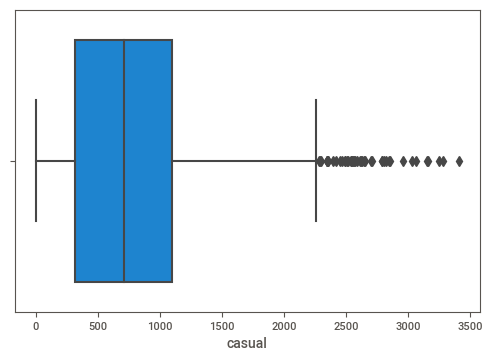

In [49]:
sns.boxplot(data.casual)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weathersit'>

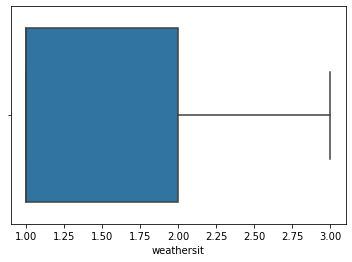

In [3]:
sns.boxplot(data.weathersit)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hum'>

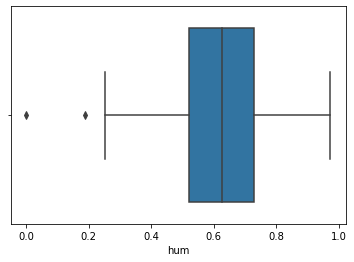

In [4]:
sns.boxplot(data.hum)

In [5]:
##Handling the outliers
data.hum.value_counts()
    # Interquartile range (IQR) 
    
from scipy import stats
IQR = stats.iqr(data.hum, interpolation = 'midpoint') 
IQR
## min and max limit calculation
# First quartile (Q1) 
Q1 = data.hum.quantile(0.25)
# Third quartile (Q3) 
Q3 =data.hum.quantile(0.75)
 ##getting the limits
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR

In [6]:
data.loc[data['hum'] <min_limit]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623


In [7]:
# imputing the outliers as the count is high
data.loc[data['hum'] < min_limit,'hum']=np.median(data.hum)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hum'>

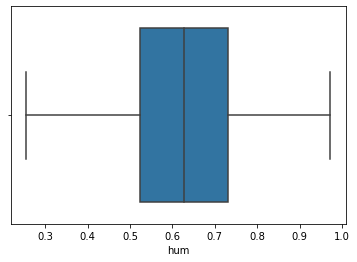

In [8]:
sns.boxplot(data.hum)

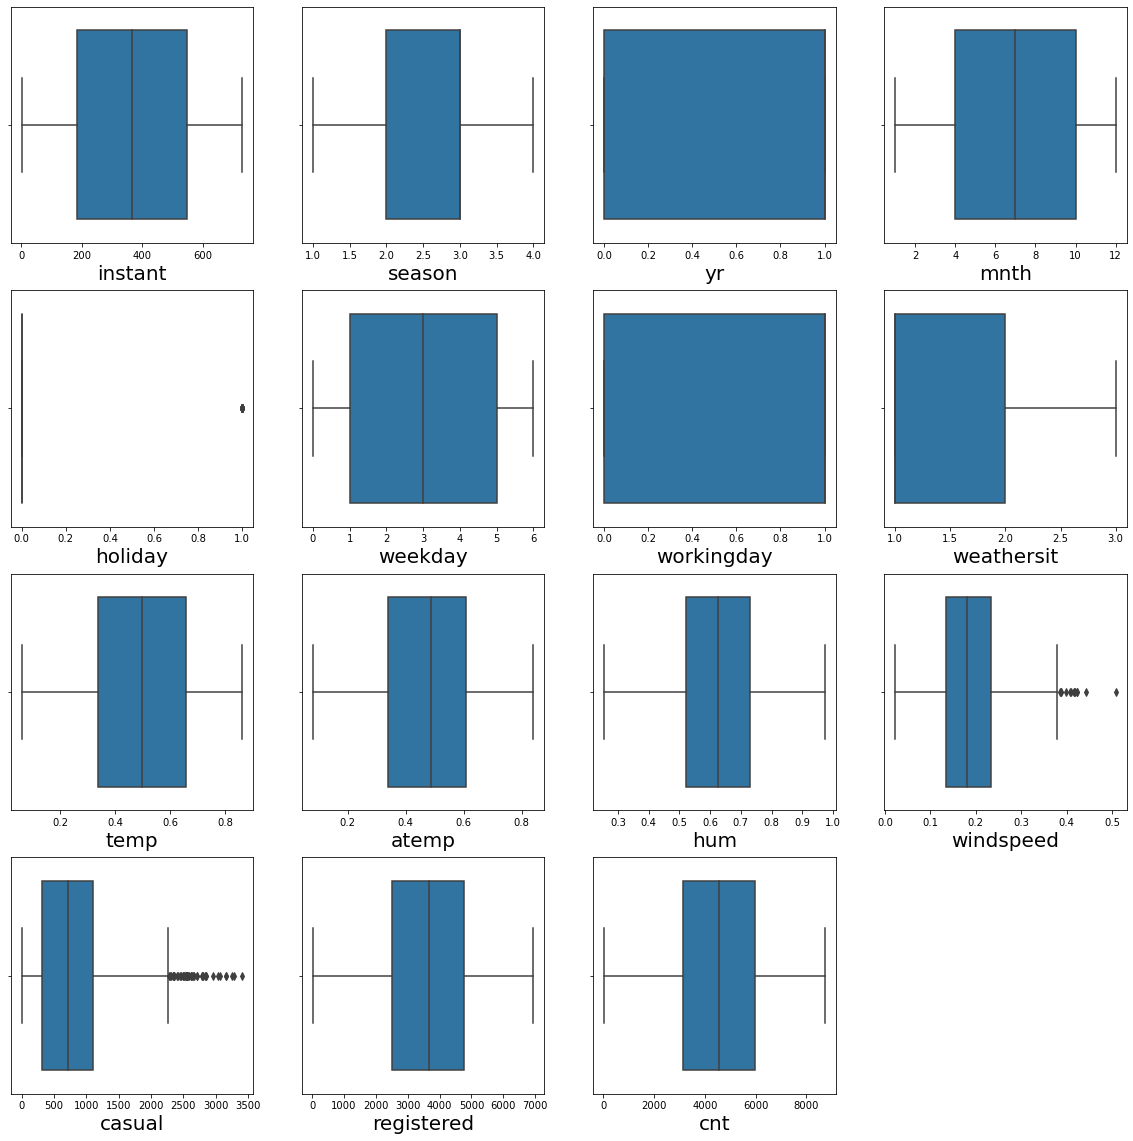

In [9]:
## Lets check outliers in any
data_num=data.drop(['dteday'],axis=1)
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in data_num:
    if plotnumber<=16 :  
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(x=data_num[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [14]:
##Handling the outliers
data.windspeed.value_counts()
    # Interquartile range (IQR) 
    
from scipy import stats
IQR = stats.iqr(data.windspeed, interpolation = 'midpoint') 
IQR
## min and max limit calculation
# First quartile (Q1) 
Q1 = data.windspeed.quantile(0.25)
# Third quartile (Q3) 
Q3 =data.windspeed.quantile(0.75)
 ##getting the limits
min_limit=Q1 - 1.5*IQR
max_limit=Q3 +1.5*IQR

In [15]:
## filetring the data
data.loc[data['windspeed'] >max_limit]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
238,239,2011-08-27,3,0,8,0,6,0,2,0.680000,0.635556,0.850000,0.375617,226,889,1115
377,378,2012-01-13,1,1,1,0,5,1,1,0.274167,0.249362,0.507500,0.378108,174,3040,3214
693,694,2012-11-24,4,1,11,0,6,0,1,0.278333,0.248742,0.404583,0.376871,532,1745,2277
720,721,2012-12-21,1,1,12,0,5,1,2,0.326667,0.301767,0.556667,0.374383,221,3402,3623


In [16]:
# imputing the outliers as the count is high
data.loc[data['windspeed'] > max_limit,'windspeed']=np.median(data.windspeed)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='windspeed'>

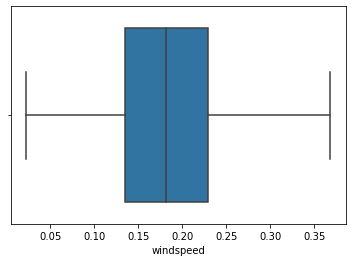

In [17]:
sns.boxplot(data.windspeed)

No outlier treatment is required for this dataset

## Feature Selection

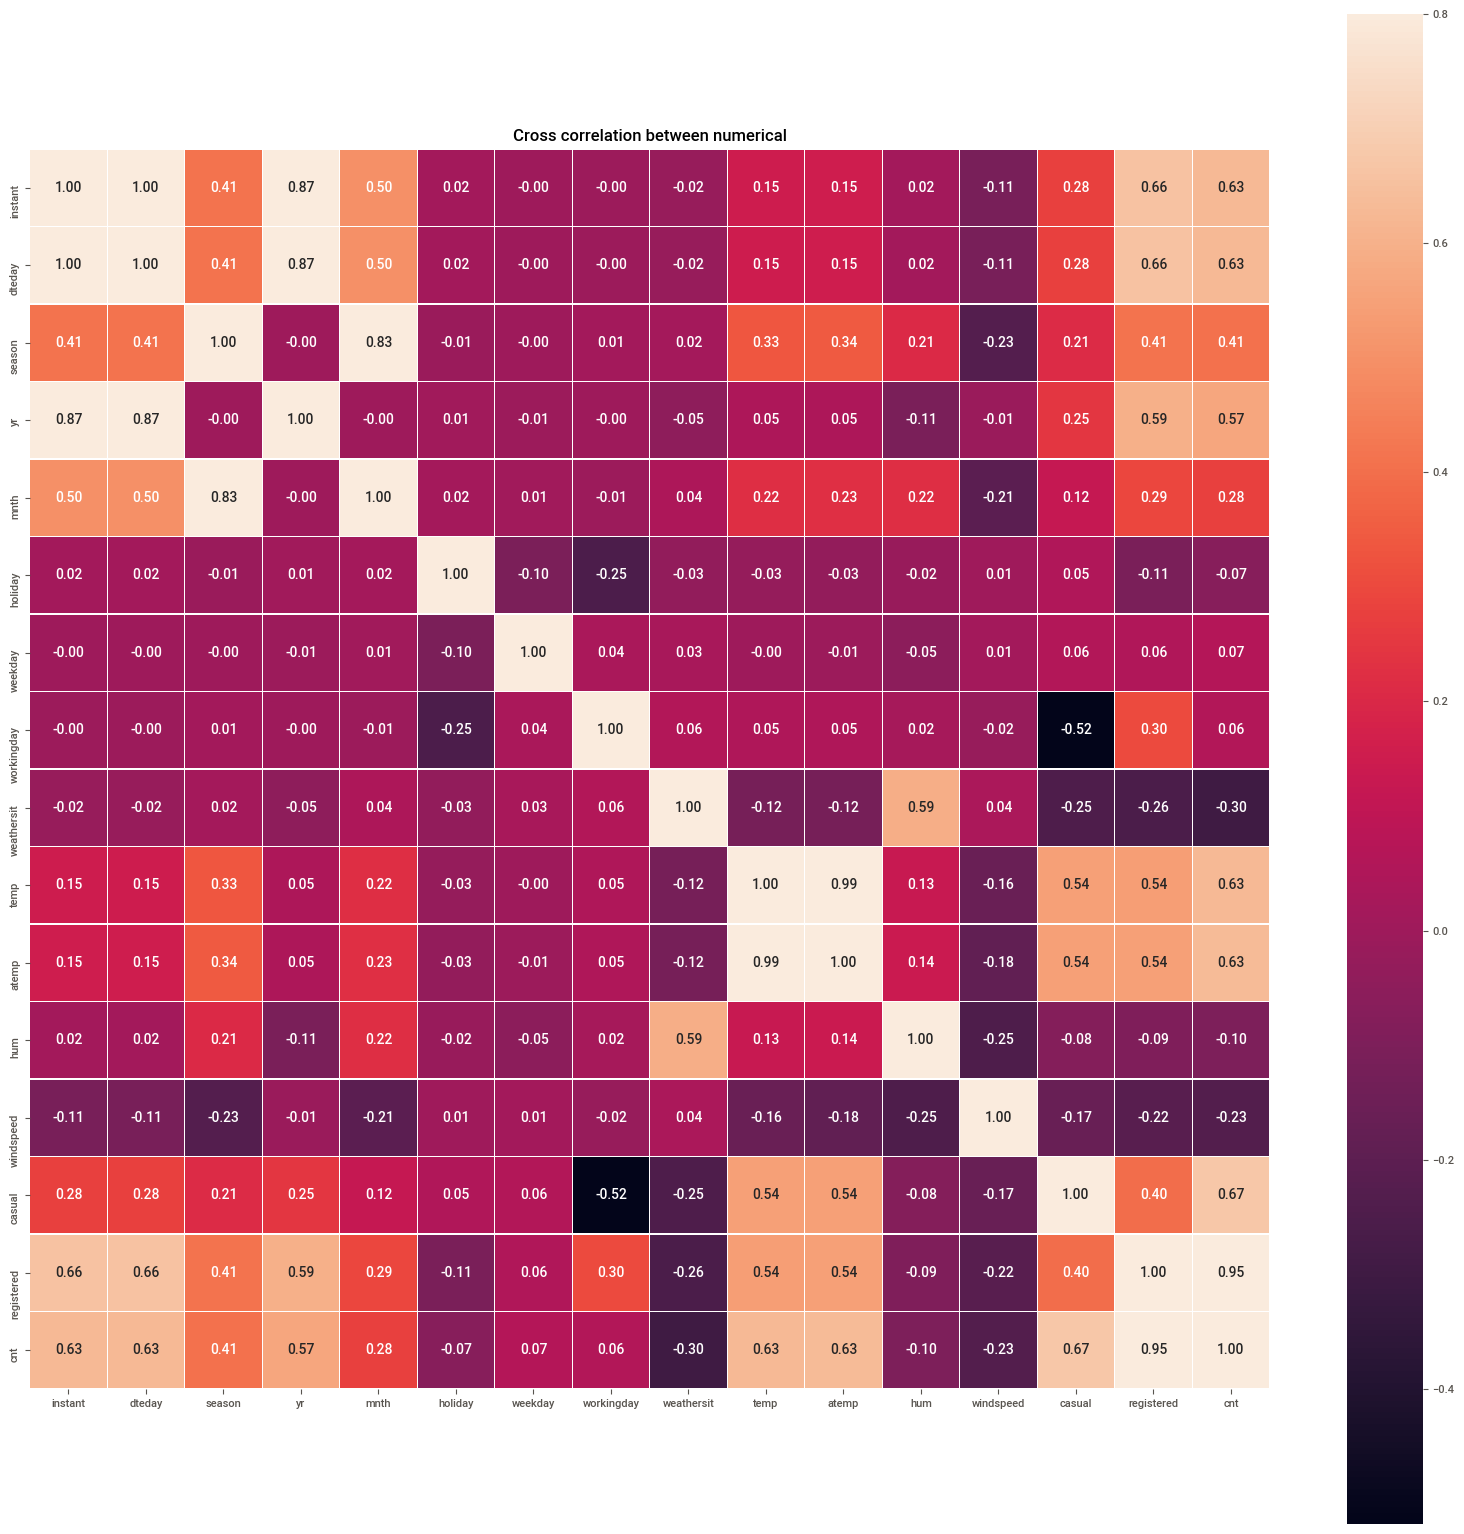

In [50]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(data.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical')
plt.show()
## instant and dteday are highly correlated to each other,we need to drop one of them
## temp and atemp are highly correlated to each other, we need to drop one of them.
## registered and cnt are highly correlated to each other, we need to drop one of them.

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    int32  
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int32(1), int64(11)
memory usage: 88.6 KB


In [18]:
data2 = data.drop(['dteday','temp','registered'],axis=1)
data2.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,cnt
0,1,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,331,985
1,2,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,131,801
2,3,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,120,1349
3,4,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,108,1562
4,5,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,82,1600


In [58]:
## checking the duplicate rows
data2.duplicated().sum()

0

In [59]:
## checking the constant features
data2.describe()
## the standard deviation of all features are not 0 ,so the there are constant features in the dataset.

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.474354,0.627894,0.190486,848.176471,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.162961,0.142429,0.077498,686.622488,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.079070,0.000000,0.022392,2.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337842,0.520000,0.134950,315.500000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.486733,0.626667,0.180975,713.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.608602,0.730209,0.233214,1096.000000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.840896,0.972500,0.507463,3410.000000,8714.000000


In [19]:
## Here in this dataset instant is unique id feature let's drop it
data3 = data2.drop(['instant'],axis=1)
data3.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual,cnt
0,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,331,985
1,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,131,801
2,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,120,1349
3,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,108,1562
4,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,82,1600


## Model Creation

In [20]:
## Definig independent and dependent variables
X=data3.iloc[:,0:-1]
y=data3.cnt

In [21]:
X

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,casual
0,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,331
1,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,131
2,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,120
3,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,108
4,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.226642,0.652917,0.350133,247
727,1,1,12,0,5,1,2,0.255046,0.590000,0.155471,644
728,1,1,12,0,6,0,2,0.242400,0.752917,0.124383,159
729,1,1,12,0,0,0,1,0.231700,0.483333,0.350754,364


In [62]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [22]:
## scaling the data as all features seems to be near to normal distribution
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()## objet creation
X_scaled = scalar.fit_transform(X)

In [23]:
## Definiging training and testing data, on training data, model will be created.Now to evaluate the 
## model,testing data is required.However on production you will have unseen data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.20,random_state=42)

### Linear Regression Model

In [24]:
## Model creation
from sklearn.linear_model import LinearRegression ## importing the model library 

LR=LinearRegression() ## creating the model object 
LR.fit(X_train,y_train) ## fitting the training data.
y_hat=LR.predict(X_test) ## prediciton from model

In [12]:
y_hat

array([5960.76800984, 1889.43327924, 3573.57855072, 5999.09208848,
       6633.67164898, 6773.6872807 , 1411.09157389, 2301.07331346,
       7373.71154158, 6129.04187111, 2237.76481376, 2237.99325537,
       4176.90910535, 5065.15936641, 2640.4957306 , 2227.84011352,
       2717.34948465, 7916.0259892 , 5778.39367491, 2299.56475655,
       7088.78856291, 6958.05661349, 5257.4001674 , 2136.32063774,
       1745.40015147, 5018.80210402, 2379.09715756, 6850.81112187,
       3855.99655508, 5616.46466595, 2249.79442847, 4149.3908819 ,
       5564.36841521, 6313.6634491 , 5602.25793192, 4225.89548275,
       6994.01864963, 6104.79253776, 3096.41946593, 1505.63591098,
       3995.44106448, 3879.63325774, 6947.21827712, 3859.25124275,
       7057.96915332, 2495.88453951, 5006.28310695, 5273.32963754,
       7416.18594045, 4706.52897132, 3556.65319123, 1877.87328238,
        775.13869804, 4932.04922393, 4694.04837317, 4521.29335579,
       3787.92149953, 2635.86372046, 5233.41362255, 7047.21691

In [25]:
## Model Evaluation
##prediciton on training data
y_train_predict=LR.predict(X_train)
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_predict)
train_score

0.8924200580491148

In [26]:
test_score=r2_score(y_test,y_hat)
test_score

0.8805441196031875

In [27]:
X_train.shape,X_test.shape

((584, 11), (147, 11))

In [28]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.89)*(584-1)/(584-11-1)
train_adjusted_r2

0.8878846153846154

In [29]:
test_adjusted_r2= 1-(1-0.88)*(147-1)/(147-11-1)
test_adjusted_r2

0.8702222222222222

In [19]:
print('intercept:', LR.intercept_) ## c value

intercept: 4518.053945299673


In [20]:
print('slope:', LR.coef_) ## m0,m1,m2,m3,m4,m5,m6

slope: [ 472.81194057  786.46997756  -61.64844748   12.01499995   52.73324131
  680.58419997 -229.92952484  378.22810167  -34.98394609  -65.06139372
 1066.11811617]


Linear Regression Model is giving accuracy of 87.0%

### KNN Model

In [30]:
### creating 2nd model
from sklearn.neighbors import KNeighborsRegressor
modelknn = KNeighborsRegressor()
modelknn.fit(X_train,y_train)
y_hat2=modelknn.predict(X_test)

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
scores = cross_val_score(modelknn,X,y,cv=3,scoring='r2')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[-0.18586928  0.1174899  -0.52555698]
Cross validation Score: -0.19797878935063815
Std : 0.26266239816121006


In [32]:
error_rate=[]
for i in range(1,21):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

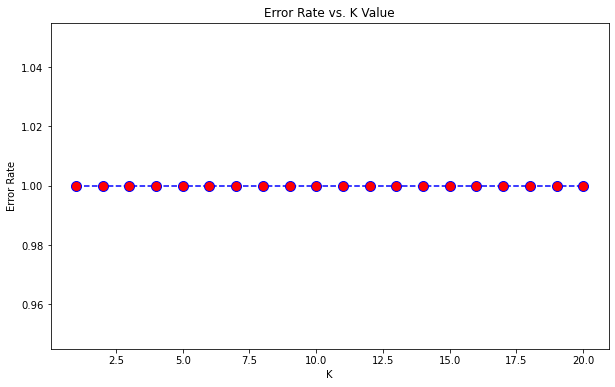

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [34]:
knn=KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred2=knn.predict(X_test)

In [35]:
r2_score(y_test,y_pred2)

0.8618116407059127

In [37]:
adj_r2_score=1-(1-0.86)*(584-1)/(584-11-1)
adj_r2_score

0.8573076923076923

In [38]:
test_adjusted_r2= 1-(1-0.86)*(147-1)/(147-11-1)
test_adjusted_r2

0.8485925925925926

KNN Model is giving accuracy of 84.8%

### Decision Tree Model

In [39]:
from sklearn.tree import DecisionTreeRegressor
dt_r=DecisionTreeRegressor()
dt_r.fit(X_train,y_train)
y_hat_dt=dt_r.predict(X_test)

In [40]:
y_train_predict=dt_r.predict(X_train)
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_predict)
train_score

1.0

In [41]:
## test acc
test_score=r2_score(y_test,y_hat_dt)
test_score

0.8890073480074696

In [42]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-1.0)*(584-1)/(584-12-1)
train_adjusted_r2

1.0

In [43]:
test_adjusted_r2= 1-(1-0.85)*(147-1)/(147-12-1)
test_adjusted_r2

0.8365671641791045

In [87]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_rgr = DecisionTreeRegressor(random_state=3)
tree_cv = GridSearchCV(tree_rgr, params, scoring="r2", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")



Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


C:\Users\Ariya\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(


KeyError: 'gini'

DECISION TREE MODEL IS GIVING ACCURACY OF 83.6%

## Random Forest Model

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf_rgr = RandomForestRegressor(n_estimators=100)
rf_rgr.fit(X_train,y_train)

RandomForestRegressor()

In [45]:
y_predict=rf_rgr.predict(X_test)

In [46]:
y_train_predict=rf_rgr.predict(X_train)
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_predict)
train_score

0.9883014811760495

In [47]:
## test acc
test_score=r2_score(y_test,y_predict)
test_score

0.9311763457684273

In [49]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.98)*(584-1)/(584-11-1)
train_adjusted_r2

0.9796153846153846

In [30]:
test_adjusted_r2= 1-(1-0.93)*(147-1)/(147-11-1)
test_adjusted_r2

0.9242962962962964

Random Forest Model is giving accuracy of 92.4 %

### Gradient Boosting Model

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor() ## object creation
gbm.fit(X_train,y_train) ## fitting the data
y_pred5=gbm.predict(X_test)

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred5)

0.9385851985402669

In [52]:
adj_r2_score=1-(1-0.93)*(584-1)/(584-11-1)
adj_r2_score

0.9286538461538462

In [54]:
## test acc
test_score=r2_score(y_test,y_pred5)
test_score

0.9385851985402669

In [55]:
test_adjusted_r2= 1-(1-0.93)*(147-1)/(147-11-1)
test_adjusted_r2

0.9242962962962964

### XG Boosting Model

In [56]:
from xgboost import XGBRegressor
xgb_r=XGBRegressor()
xgb_r.fit(X_train,y_train)
y_pred6=xgb_r.predict(X_test)

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred6)

0.9267819190239496

In [59]:
adj_r2_score=1-(1-0.92)*(584-1)/(584-11-1)
adj_r2_score

0.9184615384615384

In [61]:
test_adjusted_r2= 1-(1-0.92)*(147-1)/(147-11-1)
test_adjusted_r2

0.9134814814814816

XG Boost model is giving accuracy of 91.4%

### Bagging Model

In [62]:
## using Bagging
from sklearn.ensemble import BaggingRegressor
model_bagg=BaggingRegressor(base_estimator=xgb_r,n_estimators=20) ## model objet creation

model_bagg.fit(X_train,y_train) ## fitting the model
y_hat7=model_bagg.predict(X_test)

In [63]:
from sklearn.metrics import r2_score
r2_score(y_test,y_hat7)

0.9437251957924732

In [64]:
adj_r2_score=1-(1-0.94)*(584-1)/(584-11-1)
adj_r2_score

0.9388461538461538

In [65]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_bagg,X,y,cv=5,scoring='r2')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
## if std<0.05 model is good

[0.5201097  0.74628435 0.07346551 0.66563917 0.6782182 ]
Cross validation Score: 0.5367433869088017
Std : 0.2430801232954068


In [67]:
test_adjusted_r2= 1-(1-0.94)*(147-1)/(147-11-1)
test_adjusted_r2

0.935111111111111

 Insights from model creation: After creating 7 models, we can say that most accuracy(93.5%) is given by Bagging model using XG boosting model as best estimator.